In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_2704\4268152753.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 0. 데이터세트 로드
* `train.json`, `val.json`, `test.json`: 플레이리스트
* `genre_gn_all.json`: 장르
* `song_meta.json`: 노래 메타
 

In [6]:
DATA_PATH = "D:/dataset/멜론"

### 플레이리스트
* `train.json`, `val.json`, `test.json` = 11:2:1
    * `tags`: 태그 리스트
    * `id`: 플레이리스트 id
    * `plylist_title`: 플레이리스트 제목
    * `songs`: 노래 리스트
    * `like_cnt`: 좋아요 수
    * `updt_date`: 업데이트 날짜

In [7]:
plylist_train = pd.read_json(os.path.join(DATA_PATH, "train.json"))
plylist_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115071 entries, 0 to 115070
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   tags          115071 non-null  object
 1   id            115071 non-null  int64 
 2   plylst_title  115071 non-null  object
 3   songs         115071 non-null  object
 4   like_cnt      115071 non-null  int64 
 5   updt_date     115071 non-null  object
dtypes: int64(2), object(4)
memory usage: 6.1+ MB


In [8]:
plylist_valid = pd.read_json(os.path.join(DATA_PATH, "val.json"))
plylist_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23015 entries, 0 to 23014
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tags          23015 non-null  object
 1   id            23015 non-null  int64 
 2   plylst_title  23015 non-null  object
 3   songs         23015 non-null  object
 4   like_cnt      23015 non-null  int64 
 5   updt_date     23015 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


In [9]:
plylist_test = pd.read_json(os.path.join(DATA_PATH, "test.json"))
plylist_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10740 entries, 0 to 10739
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tags          10740 non-null  object
 1   id            10740 non-null  int64 
 2   plylst_title  10740 non-null  object
 3   songs         10740 non-null  object
 4   like_cnt      10740 non-null  int64 
 5   updt_date     10740 non-null  object
dtypes: int64(2), object(4)
memory usage: 587.3+ KB


### 장르

* genre_gn_all: 254개
    * `id`: 장르 id
    * `name`: 장르 code

In [10]:
genre_gn_all = pd.read_json(os.path.join(DATA_PATH, "genre_gn_all.json"), typ='series')
genre_gn_all = genre_gn_all.to_frame().reset_index(drop=False).rename(columns={"index":"id", 0:"name"})
genre_gn_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      254 non-null    object
 1   name    254 non-null    object
dtypes: object(2)
memory usage: 4.1+ KB


### 노래

* song_meta: 707,989개
    * `song_gn_dtl_gnr_basket`: 세부장르 리스트
    * `issue_date`: 발행 날짜
    * `album_name`: 앨범 이름
    * `album_id`: 앨범 id
    * `artist_id_basket`: 아티스트 id 리스트
    * `song_name`: 노래 이름
    * `song_gn_gnr_basket`: 장르 리스트
    * `artist_name_basket`: 아티스트 이름 리스트
    * `id`: 아이디

In [11]:
song_meta = pd.read_json(os.path.join(DATA_PATH, "song_meta.json"))
song_meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707989 entries, 0 to 707988
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   song_gn_dtl_gnr_basket  707989 non-null  object
 1   issue_date              707989 non-null  int64 
 2   album_name              707985 non-null  object
 3   album_id                707989 non-null  int64 
 4   artist_id_basket        707989 non-null  object
 5   song_name               707989 non-null  object
 6   song_gn_gnr_basket      707989 non-null  object
 7   artist_name_basket      707989 non-null  object
 8   id                      707989 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 54.0+ MB


# 1. 플레이리스트

### 플레이리스트의 총 수록곡, 태그, 제목 수 (중복포함/중복제거)
| | 수록곡 | 태그 | 제목 |
|-------|--------|-----|------|
|중복포함|5,285,871|476,331|115,071|
|중복제거|615,142|29,160|115,071|

#### 중복포함

In [12]:
plylist_train.head(3)

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000


In [13]:
plylist_train_songs = plylist_train[["id","songs"]]
plylist_train_tags = plylist_train[["id", "tags"]]

In [14]:
plylist_train_songs_exploded = plylist_train_songs.explode("songs").reset_index(drop=True)
plylist_train_songs_exploded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5285871 entries, 0 to 5285870
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   songs   object
dtypes: int64(1), object(1)
memory usage: 80.7+ MB


In [15]:
plylist_train_tags_exploded = plylist_train_tags.explode("tags").reset_index(drop=True)
plylist_train_tags_exploded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476331 entries, 0 to 476330
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      476331 non-null  int64 
 1   tags    476331 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.3+ MB


#### 중복제거

In [16]:
len(set(plylist_train_songs_exploded["songs"]))

615142

In [17]:
len(set(plylist_train_tags_exploded["tags"]))

29160

### 플레이리스트 당 평균 수록곡, 태그, 장르 수

* 평균 수록곡 수: 46곡
* 평균 태그 수: 4개
* 평균 장르 수 (대분류 기준): 6.6개

In [18]:
sum(plylist_train_songs["songs"].map(lambda row: len(row)))/(len(plylist_train_songs))

45.935735328623196

In [19]:
plylist_train_with_song_cnt = plylist_train_songs.copy()
#id(plylist_train_with_song_cnt) == id(plylist_train_songs)
plylist_train_with_song_cnt["song_cnt"] = plylist_train_songs["songs"].map(lambda row: len(row))//10
plylist_train_with_song_cnt = plylist_train_with_song_cnt.sort_values(by="song_cnt", ascending=True)
song_cnt_range = plylist_train_with_song_cnt.groupby(by="song_cnt")["songs"].count()
song_cnt_range_idx = [str(f"{i*10}-{i*10+9}") for i in range(len(song_cnt_range))] 

Text(0, 0.5, '플레이리스트 수')

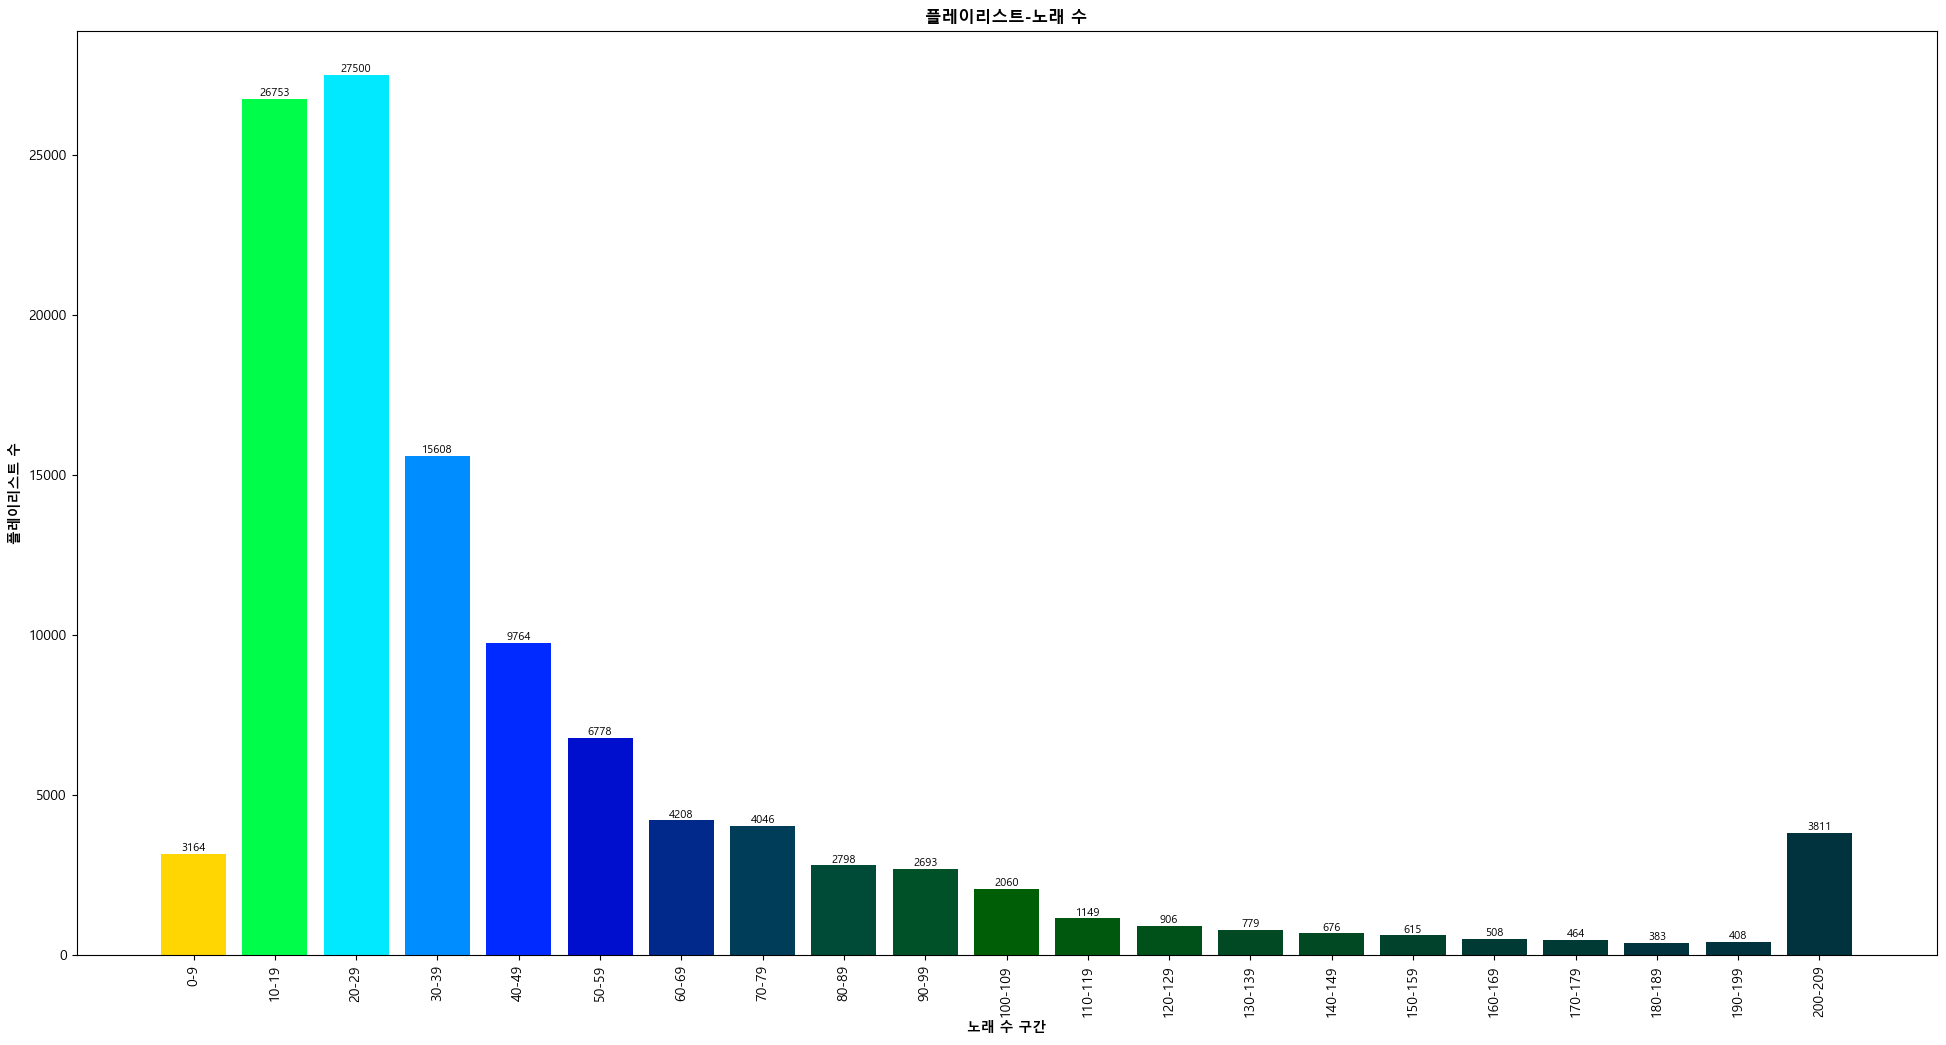

In [20]:
plt.figure(figsize=(24,12))
colors = plt.cm.gist_ncar([150//(i+1) for i in range(len(song_cnt_range))])
bars = plt.bar(song_cnt_range_idx, song_cnt_range, color=colors)
for bar, value in zip(bars, song_cnt_range):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=8)
plt.xticks(np.arange(len(song_cnt_range_idx)), song_cnt_range_idx, rotation='vertical')
plt.title("플레이리스트-노래 수", fontweight='bold')
plt.xlabel("노래 수 구간", fontweight='bold')
plt.ylabel("플레이리스트 수", fontweight='bold')

In [21]:
sum(plylist_train_tags["tags"].map(lambda row: len(row)))/(len(plylist_train_songs))

4.139453033344631

In [22]:
plylist_train_with_tag_cnt = plylist_train_tags.copy()
plylist_train_with_tag_cnt["tag_cnt"] = plylist_train_tags["tags"].map(lambda row: len(row))
plylist_train_with_tag_cnt = plylist_train_with_tag_cnt.sort_values(by="tag_cnt", ascending=True)
tag_cnt_range = plylist_train_with_tag_cnt.groupby(by="tag_cnt")["tags"].count()
tag_cnt_range_idx = [i+1 for i in range(len(tag_cnt_range))]
tag_cnt_range

tag_cnt
1     27242
2     20725
3     16245
4     10770
5      6613
6      5351
7      4986
8      5080
9      5484
10    12570
11        5
Name: tags, dtype: int64

Text(0, 0.5, '플레이리스트 수')

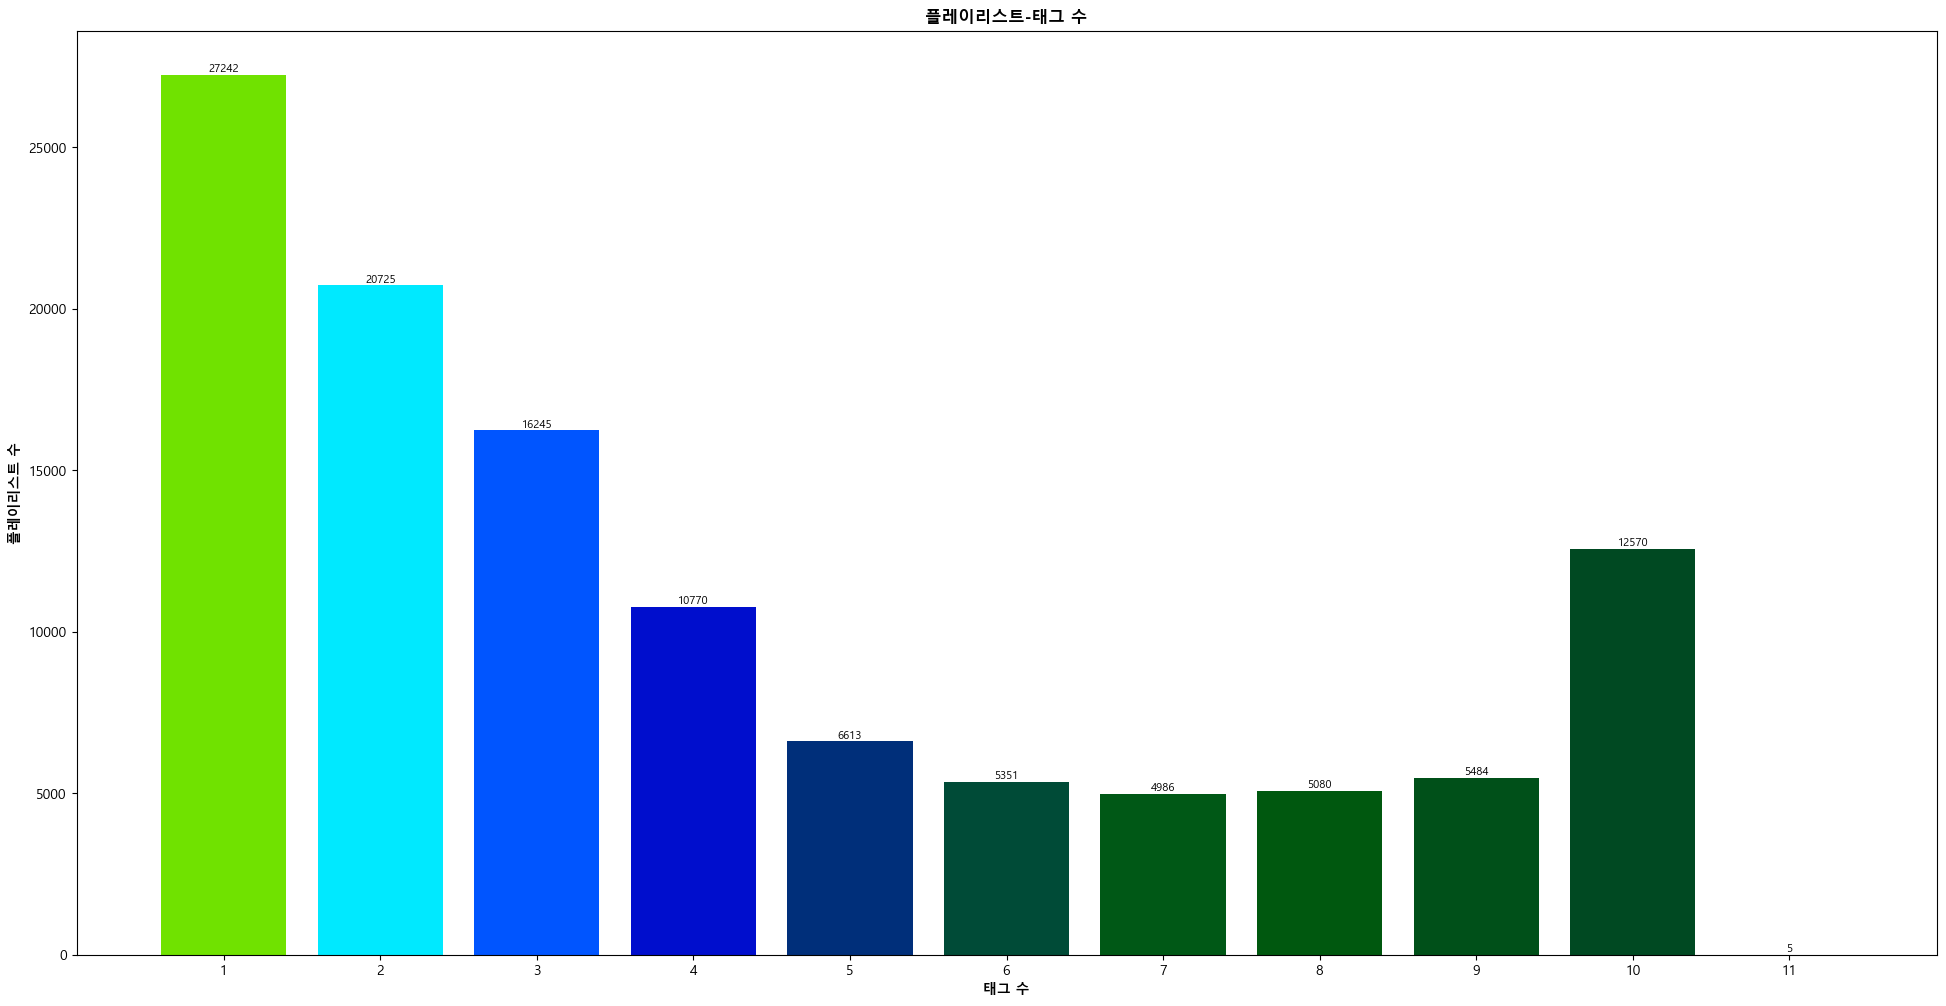

In [23]:
plt.figure(figsize=(24,12))
colors = plt.cm.gist_ncar([100//(i+1) for i in range(len(tag_cnt_range))])
bars = plt.bar(tag_cnt_range_idx, tag_cnt_range, color=colors)
for bar, value in zip(bars, tag_cnt_range):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=8)
plt.xticks(tag_cnt_range_idx)
plt.title("플레이리스트-태그 수", fontweight='bold')
plt.xlabel("태그 수", fontweight='bold')
plt.ylabel("플레이리스트 수", fontweight='bold')

In [24]:
# 플레이리스트 당 평균 장르 수
song_meta_genre = song_meta[["id", "song_gn_gnr_basket"]] # 노래id, 장르id
song_meta_genre_exploded = song_meta_genre.explode("song_gn_gnr_basket")
song_meta_genre_exploded

plylist_song_merged = pd.merge(plylist_train_songs_exploded, song_meta_genre_exploded, how="inner", left_on="songs", right_on="id")
plylist_song_merged = plylist_song_merged.rename(columns={"id_x":"plylist_id", "song_gn_gnr_basket":"genres"})
plylist_song_merged_gnr_cnt = plylist_song_merged.groupby(by="plylist_id")["genres"].nunique()
plylist_song_merged_gnr_cnt_df = plylist_song_merged_gnr_cnt.to_frame("gnr_cnt").reset_index(drop=False).sort_values("gnr_cnt", ascending=True)
plylist_song_merged_gnr_cnt_df.tail(3)

,plylist_id,gnr_cnt
47408,63262,25
41324,55221,25
89511,119331,26


In [25]:
sum(plylist_song_merged_gnr_cnt_df['gnr_cnt'])/len(plylist_song_merged_gnr_cnt_df)

6.550912045606625

In [26]:
plylist_song_merged_gnr_cnt_df["range"] = plylist_song_merged_gnr_cnt_df["gnr_cnt"].map(lambda row: row//3)
gnr_cnt_range = plylist_song_merged_gnr_cnt_df.groupby(by="range")["plylist_id"].count()
gnr_cnt_range_idx = [str(f"{i*3}-{i*3+2}") for i in range(len(gnr_cnt_range))]
print(gnr_cnt_range_idx) 

['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '21-23', '24-26']


Text(0, 0.5, '플레이리스트 수')

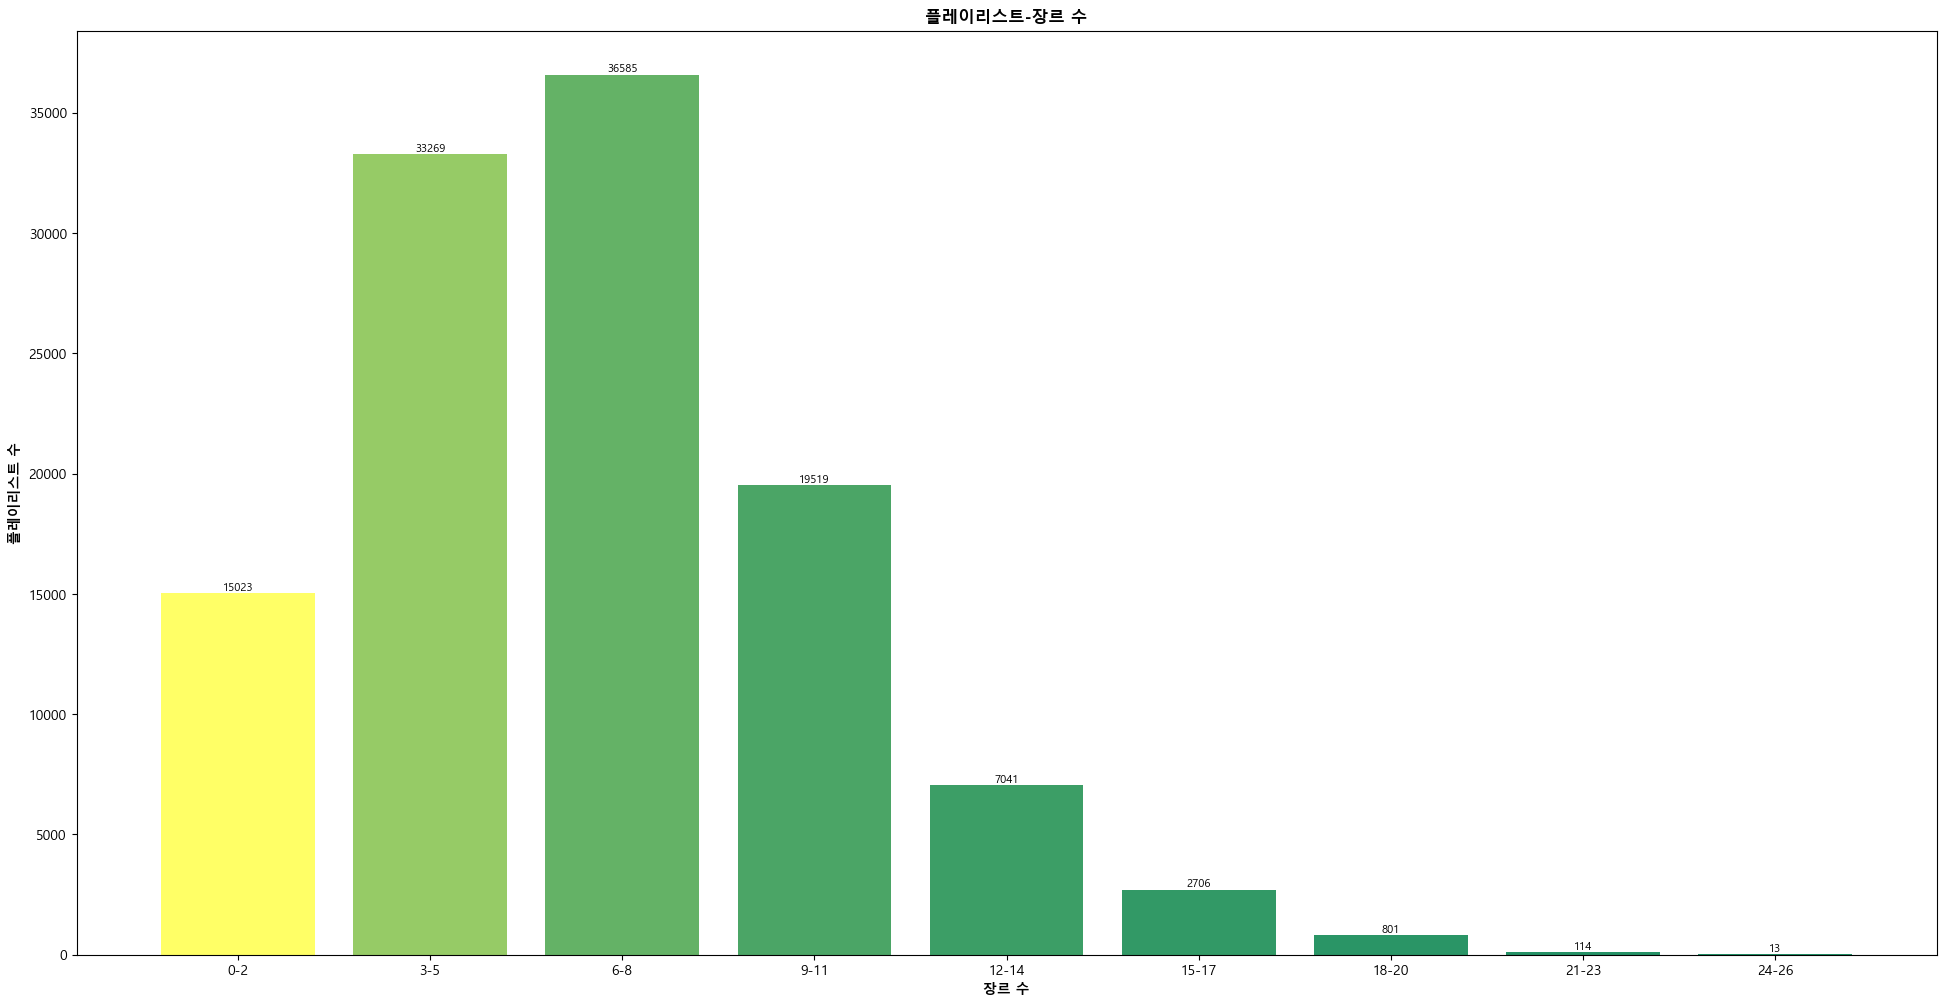

In [27]:
plt.figure(figsize=(24,12))
colors = plt.cm.summer([300//(i+1) for i in range(len(gnr_cnt_range))])
bars = plt.bar(gnr_cnt_range_idx, gnr_cnt_range, color=colors)
for bar, value in zip(bars, gnr_cnt_range):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=8)
plt.xticks(gnr_cnt_range_idx)
plt.title("플레이리스트-장르 수", fontweight='bold')
plt.xlabel("장르 수", fontweight='bold')
plt.ylabel("플레이리스트 수", fontweight='bold')

### TOP10 플레이리스트

In [28]:
plylist_top10 = plylist_train.sort_values(by="like_cnt", ascending=False).head(10)
plylist_top10 = plylist_top10[["id", "tags", "plylst_title", "like_cnt", "songs"]]
plylist_top10.head(10)

,id,tags,plylst_title,like_cnt,songs
46524,74220,"[노동요, 취향저격, 드라이브, Pop, 기분전환, 트렌디, 스트레스, 신나는]",HOT TRENDY POP: 놓쳐선 안될 'POP' (매주 업데이트),53211,"[159317, 368264, 600999, 274905, 643023, 24070..."
85071,122388,"[감성, 새벽, 때껄룩, 잔잔한, 휴식, 팝송, 떼껄룩, 힐링, 팝, 신나는]",❤️때껄룩님 ᴛᴀᴋᴇ ᴀ ʟᴏᴏᴋ 플레이리스트❤️,41844,"[532771, 383775, 432753, 176384, 152694, 60126..."
102651,26174,"[매장음악, 카페, 러블리쏘, 분위기, 드라이브, 여행, 매력적인, 기분전환, 팝]",듣다보면 '우와!' 하고 제목을 보게되는 팝,27268,"[40160, 20039, 561488, 20051, 16242, 256568, 7..."
101464,72658,"[흥겨운, 드라이브, Pop, 기분전환, 경쾌한, 외출, 내적댄스, 기분업, 충전,...","약속 있어? 외출 전, 기분 UP 하고 싶을 때 들어봐! [매주 목요일]",23965,"[111779, 406878, 417725, 129878, 357770, 34879..."
59894,113501,"[힐링, 휴식, 기분전환]",감성이 터지는 팝음악들,23732,"[342524, 1233, 417666, 394523, 107455, 17206, ..."
32411,72684,"[신비로운, 비오는날, 밤, 신비, 몽환, 뉴에이지, 팝]",신비롭거나 몽환적 느낌이 나는 곡,23032,"[282155, 390973, 161304, 281488, 371473, 82671..."
31406,38507,[카페],♪중독성강한음악들♪,21045,"[195197, 487343, 434533, 105845, 433543, 45583..."
1519,39508,"[휴식, 밤, 잔잔한, 새벽, 감성, 뉴에이지, 피아노, 밤에듣기좋은노래]",제목이 기억안나서 못들었던 뉴에이지,20677,"[420205, 229473, 621441, 337447, 291668, 35854..."
40950,102123,"[봄, 가을, 달달, 명곡, 힐링, 설렘, 사랑]",여자들 취향저격하는 달달한 노래,20149,"[481910, 216728, 460884, 547506, 541420, 10636..."
74816,11762,"[감성, 밤, 여름밤, 새벽감성, 새벽, 밤에듣기좋은노래, 새벽에듣기좋은노래, 잠들...",불 꺼진 방 침대 속 자기 직전... 듣기 좋은 노래 ⭐,19758,"[13815, 366786, 454528, 451593, 61159, 231078,..."


In [29]:
plylist_top10_songs = plylist_top10[["plylst_title", "songs"]]
plylist_top10_songs_exploded = plylist_top10_songs.explode("songs")

song_meta_name = song_meta[["id", "song_name"]]
plylist_top10_songs_merged = pd.merge(plylist_top10_songs_exploded, song_meta_name, how="inner", left_on="songs", right_on="id")
plylist_top10_songs_with_song_name = plylist_top10_songs_merged.groupby(["plylst_title"]).agg({"song_name": lambda row: row.tolist()})
plylist_top10_songs_with_song_name = plylist_top10_songs_with_song_name.reset_index(drop=False).rename(columns={"id_x":"plylist_id"})
pd.set_option('display.max_colwidth', None)
plylist_top10_songs_with_song_name.head(10)

,plylst_title,song_name
0,HOT TRENDY POP: 놓쳐선 안될 'POP' (매주 업데이트),"[Confidant, How To Love (feat. GRAY), Say It Again, Another Life (Feat. Destiny Rogers), 6 months, Phobias, Old Me, Dancing Next To Me, Modern Loneliness, ringtone (Remix) [feat. Charli XCX, Rico Nasty, Kero Kero Bonito], not ur friend, Good Day, I Do, Love Don&#39;t Cost A Thang (Feat. Lemaitre), U Know It&#39;s Real, Nobody&#39;s Lover (feat. Lord Siva), VCR, Don&#39;t Believe In Love, Hard to Say (feat. I.E.), Fabulous, GITY, Tennis Fan (feat. Empress Of), Nikes On, Alone With You (Feat. AlunaGeorge), Spring Break (feat. Rich The Kid), Flashback, Young & Alive, Tricky (feat. Sabrina Carpenter), L.O.V.E., Bad Child, Stay All Night, How To Be Lonely, Kings & Queens, Jealous, Worry About Me, VCR, Forever, Arms Around Me, Jealous of Myself, I Believe In You (Feat. Francis and The Lights), Pedestrian, Obvious, Kitchen Table, Lies, Bang My Head, Wish You Were Sober, Friday, Tongue Tied, ANIMAL CROSSING, Baby Girl (feat. Jeremih), Superpower, If It Was Me, blue, I Love You&#39;s, Bad Intentions, Break My Heart, Y U Gotta B Like That (feat. KYLE), Invisible, Old Me, cherry wine, Somebody Like You, Back in the Game, Knew You, Break Up Song, Swimming in the Deep End, Renee&#39;s Song, MISCOMMUNICATIONS, Facade, Stained Glass, Fuck My Friends, Boys Ain&#39;t Shit (feat. Tate McRae & Audrey Mika), MESS, Run Into You, Balloons (feat. Tank), Somebody Else, Hold You Tonight, I miss you, I’m sorry, Party Shit / Misbehaving, Imagine U, Trust, nothing2prove, Karate, Remember Me (feat. BIA), Ideas, MAMACITA, LOUD, Knocked Me Off My Feet, Time, Boyfriend, Fear Of Being Alone, Six Feet Apart, I&#39;m Ready, Keep On Dancing, somebody loves you, Freedom (feat. Zak Abel), Everytime (Cover), i think too much, Details (feat. Boy Matthews), Look For The Good (Single Version), Gimme Love]"
1,♪중독성강한음악들♪,"[Keep Your Worries, Another Sad Song, 재회, 습관, 드라마, Last Scene, 홍대 앞에 눈이 내리면, Back To Next, Between The Sheets, Luv Punch, Fragile Days, 춤, Fly Me To The Moon (In Other Words), 혼(魂) (Inst.), Speechless (Vanilla Soul Remix), Say That You Love Me, Truly Unique, Soon Come, Talullah, Insomnia, 정전기, 비오는 날, Him & Me (Feat. 다이나믹 듀오), This Is Not A Love Song, In A Manner Of Speaking, That`s Why, 시간이 흐른뒤엔, Picture Perfect Love (Feat. Monkey Majik), 이 노래, 그녀가 나를 보네, Days And Days (Feat. Coralie Clement), July, 오늘밤, 시간이 약이 된다고...(With Mogi) (Original Ver.), 사랑해 바보야 (Feat. 윤도현), 잘살아라, 사랑해, Barano Nai Hanaya / 薔薇のない花屋 (후지TV 드라마 '장미없는 꽃집') (Depression Of The Director), 눈물아 슬픔아, Close To Me, Winterdays, Merry Christmas Mr. Lawrence - FYI, Second First Date (feat. Ritha K) (Bonus Track from Jazz Set), 집시의 시간, Night In Camp Nou (Feat. 정엽), 서울볼레로 (Feat. 전제덕), 물망초, 너에게, 그대를 사랑하는, 냄새나는 여자, Pillow Talk, Something Don`t Feel Right (Inst.), 안녕, And July (Feat. DEAN, DJ Friz), All I Wanna Do (K) (Feat. Hoody, Loco), 오늘 취하면 (Feat. 창모) (Prod. SUGA), love (Feat. Syd), A Good Day, Blue, Done For Me, 잊을만하면, LA Girls, 야몽음인 (夜夢陰人), BRAVE]"
2,❤️때껄룩님 ᴛᴀᴋᴇ ᴀ ʟᴏᴏᴋ 플레이리스트❤️,"[Basket Case, I Was Born To Love You, More Than Words, All I`ve Ever Known, Play That Funky Music, Sunday In New York, Stand By Me, Don`t Look Back In Anger, Fooled Around And Fell In Love, Put Your Records On, Nothing Lasts Forever, How Deep Is Your Love, Fireflies, Whatever, Video Games, We Are Young (Feat. Janelle Monae), Thrift Shop (Feat. Wanz), Take On Me, Robbers, Here`s To Never Growing Up, Bitchin` Summer, Live Your Life (English Version), Land Of Opportunity, Lost Stars, All About That Bass, The Simple Things, First Date (Feat. Wade & Tyler Alexis), Be Be Your Love, Hero, Crave You (Feat. Giselle), Baby It`s Cold Outside, Earned It (Fifty Shades Of Grey) (From &#34;Fifty Shades Of Grey&#34; Soundtrack), Near, Bills, Hollywood, 공드리, Want To Want Me, Soap, Lost Boy, Pretty Thoughts (FKJ Remix), Crazy In Love (Remix), Can`t Help Falling In Love, Gold, &#1588;&#1610;&#1591;&#1575;&#1606; (Untitled), Marvin Gaye (Feat. Meghan Trainor), What If I Go

# 2. 장르

### 장르-세부장르 코드

In [30]:
cat1 = set()
cat1_cat2 = dict()
cat_name = dict() # code : name
cat1_cat2_name = dict()
for _, row in genre_gn_all.iterrows():
    if row['id'][-2:]=='00':
        cat1.add(row['id'])
        cat1_cat2[row['id']] = list()
        cat1_cat2_name[row['name']] = list()
    else:
        cat1_id = row['id'][:-2]+"00"
        cat1_cat2[cat1_id].append(row['id'])
        cat1_cat2_name[cat_name[cat1_id]].append(row['name'])
    cat_name[row['id']] = row['name']

#print(cat1)
#print(cat1_cat2)
#print(cat_name)
cat1.add("GN9000")
cat1_cat2["GN9000"] = list()
cat1_cat2_name["크리스마스"] = list()
cat_name["GN9000"] = "크리스마스"
print(f"대분류 수: {len(cat1)}")
for key, value in cat1_cat2_name.items():
    print(f"{key}: {value}")


대분류 수: 31
발라드: ['세부장르전체', "'80", "'90", "'00", "'10-"]
댄스: ['세부장르전체', "'80", "'90", "'00", "'10-"]
랩/힙합: ['세부장르전체', '팝랩', '얼터너티브힙합', '갱스터/하드코어랩', 'East&West', "'80", "'90", "'00", "'10-"]
R&B/Soul: ['세부장르전체', '컨템포러리 R&B', '소울', '어반', "'60-'70", "'80-'90", "'00", "'10-"]
인디음악: ['세부장르전체', '포크', '록', '일렉', '힙합', '발라드', "'90", "'00", "'10-"]
록/메탈: ['세부장르전체', '모던록', '얼터너티브록', '프로그레시브/아트록', '하드록', '헤비메탈', '뉴메탈/하드코어', '포스트록', "'60", "'70", "'80", "'90", "'00", "'10-"]
성인가요: ['세부장르전체', '신세대트로트', '전설의트로트', '뽕짝트로트', '트로트메들리', "트로트'60-'70", "트로트'80-'90", "트로트'00-", "성인가요'80-'90", "성인가요'00-"]
포크/블루스: ['세부장르전체', "'60-'70", "'80-'90", "'00", "'10-"]
POP: ['세부장르전체', '얼터너티브팝', '올디스', '월드팝', "'60-'70", "'80-'90", "'00", "'10-"]
일렉트로니카: ['세부장르전체', '댄스 스타일', '팝 스타일', '시대별']
포크/블루스/컨트리: ['세부장르전체', '포크', '블루스', '컨트리', "'60-'70", "'80-'90", "'00-"]
OST: ['세부장르전체', '국내영화', '국외영화', '국내드라마', '국외드라마', '애니메이션/게임', '국내뮤지컬', '국외뮤지컬', '애니메이션/웹툰', '게임']
클래식: ['세부장르전체', '관현악', '교향곡', '실내악', '협주곡', '독주곡', '오페라', '크로스오

### 장르 별 노래 수

* "크리스마스" 장르 수정 필요: GN3000 <- GN9000

In [31]:
# 장르별 노래 수
song_meta_genre = song_meta[["id", "song_name", "song_gn_gnr_basket", "song_gn_dtl_gnr_basket"]]
song_meta_genre_exploded = song_meta_genre.explode("song_gn_gnr_basket")
song_meta_song_cnt_by_genre = song_meta_genre_exploded.groupby("song_gn_gnr_basket")["id"].count().reset_index(drop=False).rename(columns={"song_gn_gnr_basket":"gnr", "id":"cnt"})

In [32]:
song_meta_song_cnt_range = song_meta_song_cnt_by_genre["cnt"]
song_meta_song_cnt_idx = song_meta_song_cnt_by_genre["gnr"]
song_meta_song_cnt_label = song_meta_song_cnt_idx.map(lambda row : row+"_"+cat_name[row]).to_list()

Text(0, 0.5, '노래 수')

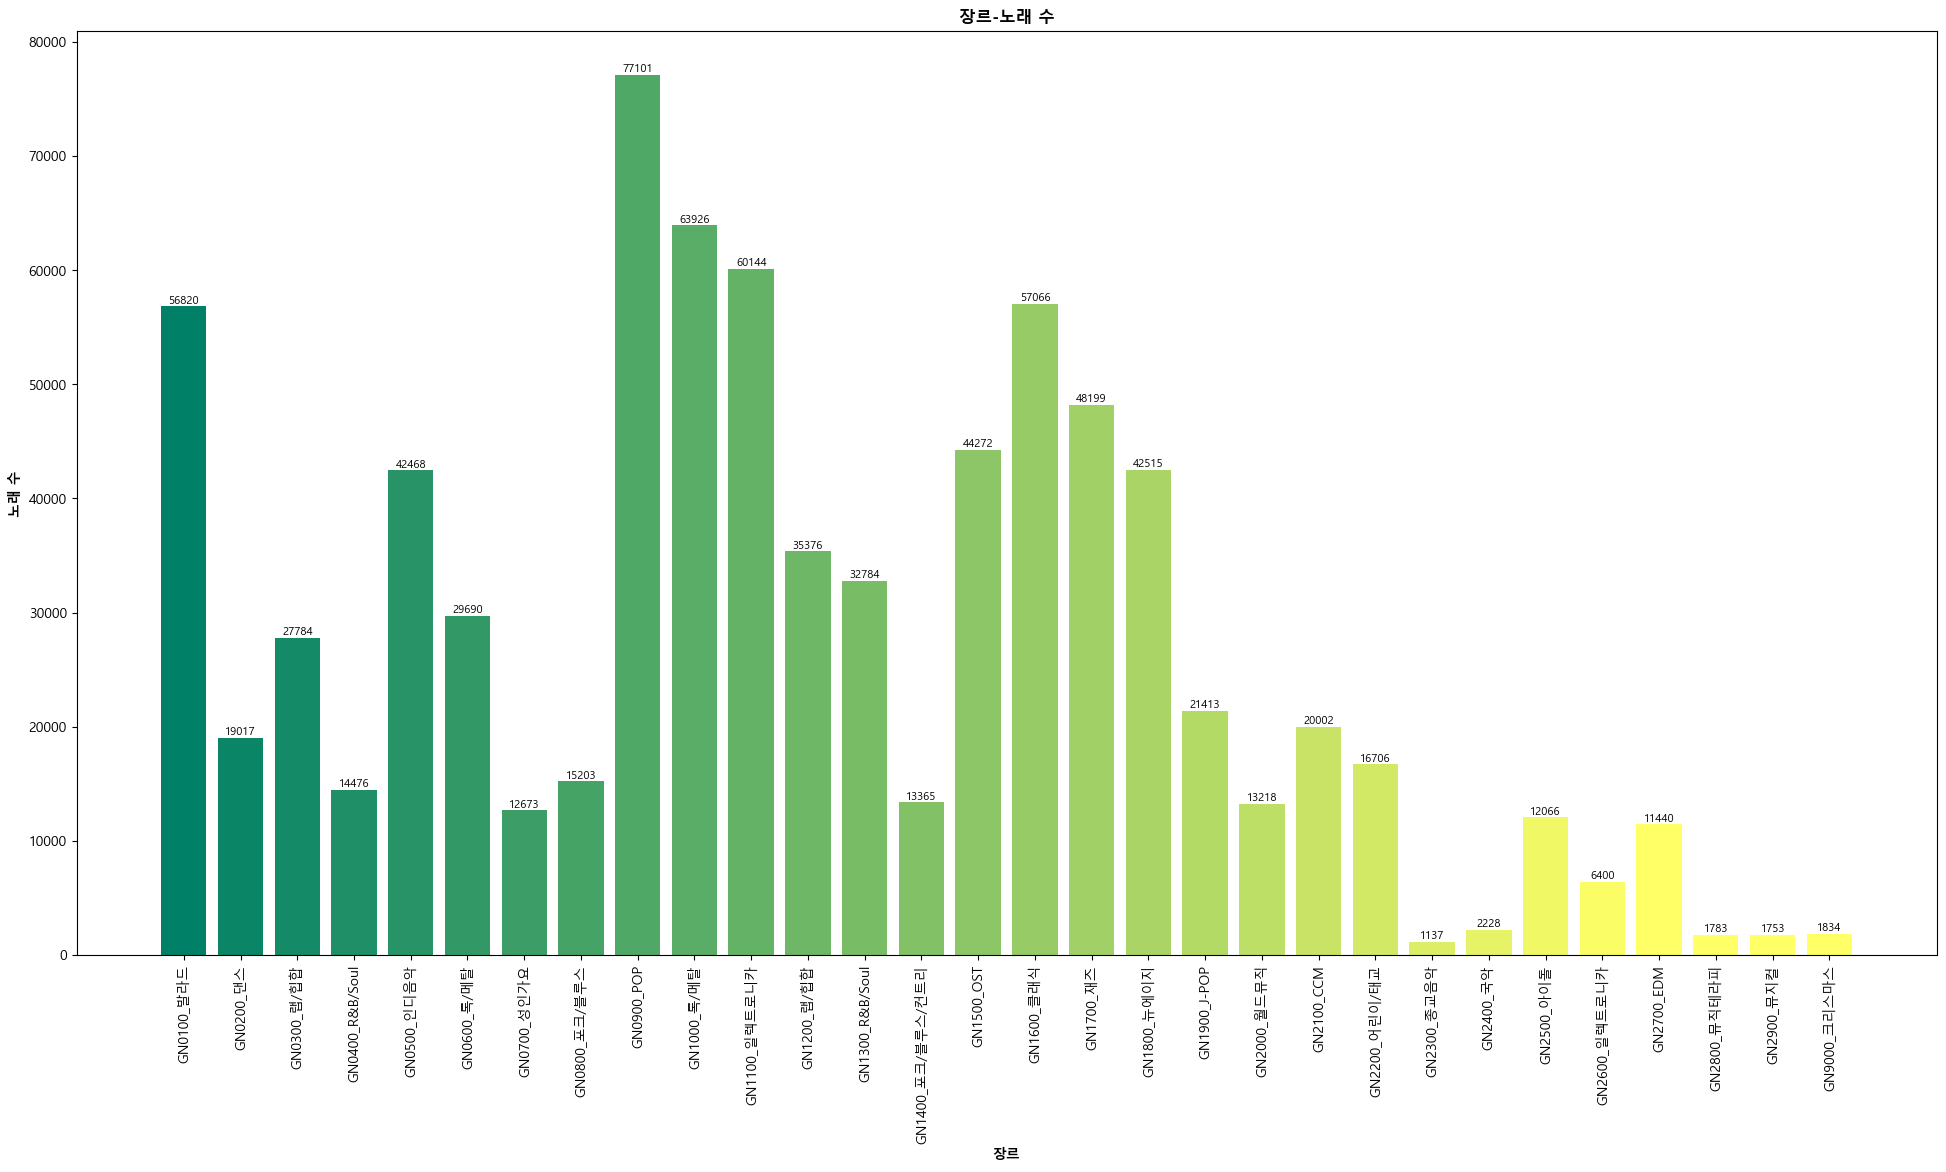

In [33]:
plt.figure(figsize=(24,12))
colors = plt.cm.summer([i*10 for i in range(len(song_meta_song_cnt_by_genre))])
bars = plt.bar(song_meta_song_cnt_label, song_meta_song_cnt_range, color=colors)
for bar, value in zip(bars, song_meta_song_cnt_range):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=8)
plt.xticks(song_meta_song_cnt_label, rotation="vertical")

plt.title("장르-노래 수", fontweight='bold')
plt.xlabel("장르", fontweight='bold')
plt.ylabel("노래 수", fontweight='bold')

# 3. 수록곡

### 수록곡의 발매년도

In [34]:
# 장르별 노래 수
song_meta_issue_date = song_meta[["id", "issue_date"]]
song_meta_issue_date["issue_date"] = song_meta_issue_date["issue_date"].map(lambda row: row//10000)
song_meta_issue_date = song_meta_issue_date.groupby("issue_date")["id"].count().reset_index(drop=False).rename(columns={"id":"cnt"})

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_2704\2793203528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_meta_issue_date["issue_date"] = song_meta_issue_date["issue_date"].map(lambda row: row//10000)


In [35]:
song_meta_issue_date_range = song_meta_issue_date["issue_date"]
song_meta_issue_date_cnt = song_meta_issue_date["cnt"]
song_meta_issue_date_label = song_meta_issue_date_range.map(lambda row: str(row)).to_list()

발매년도 없음: 2795

Text(0, 0.5, '노래 수')

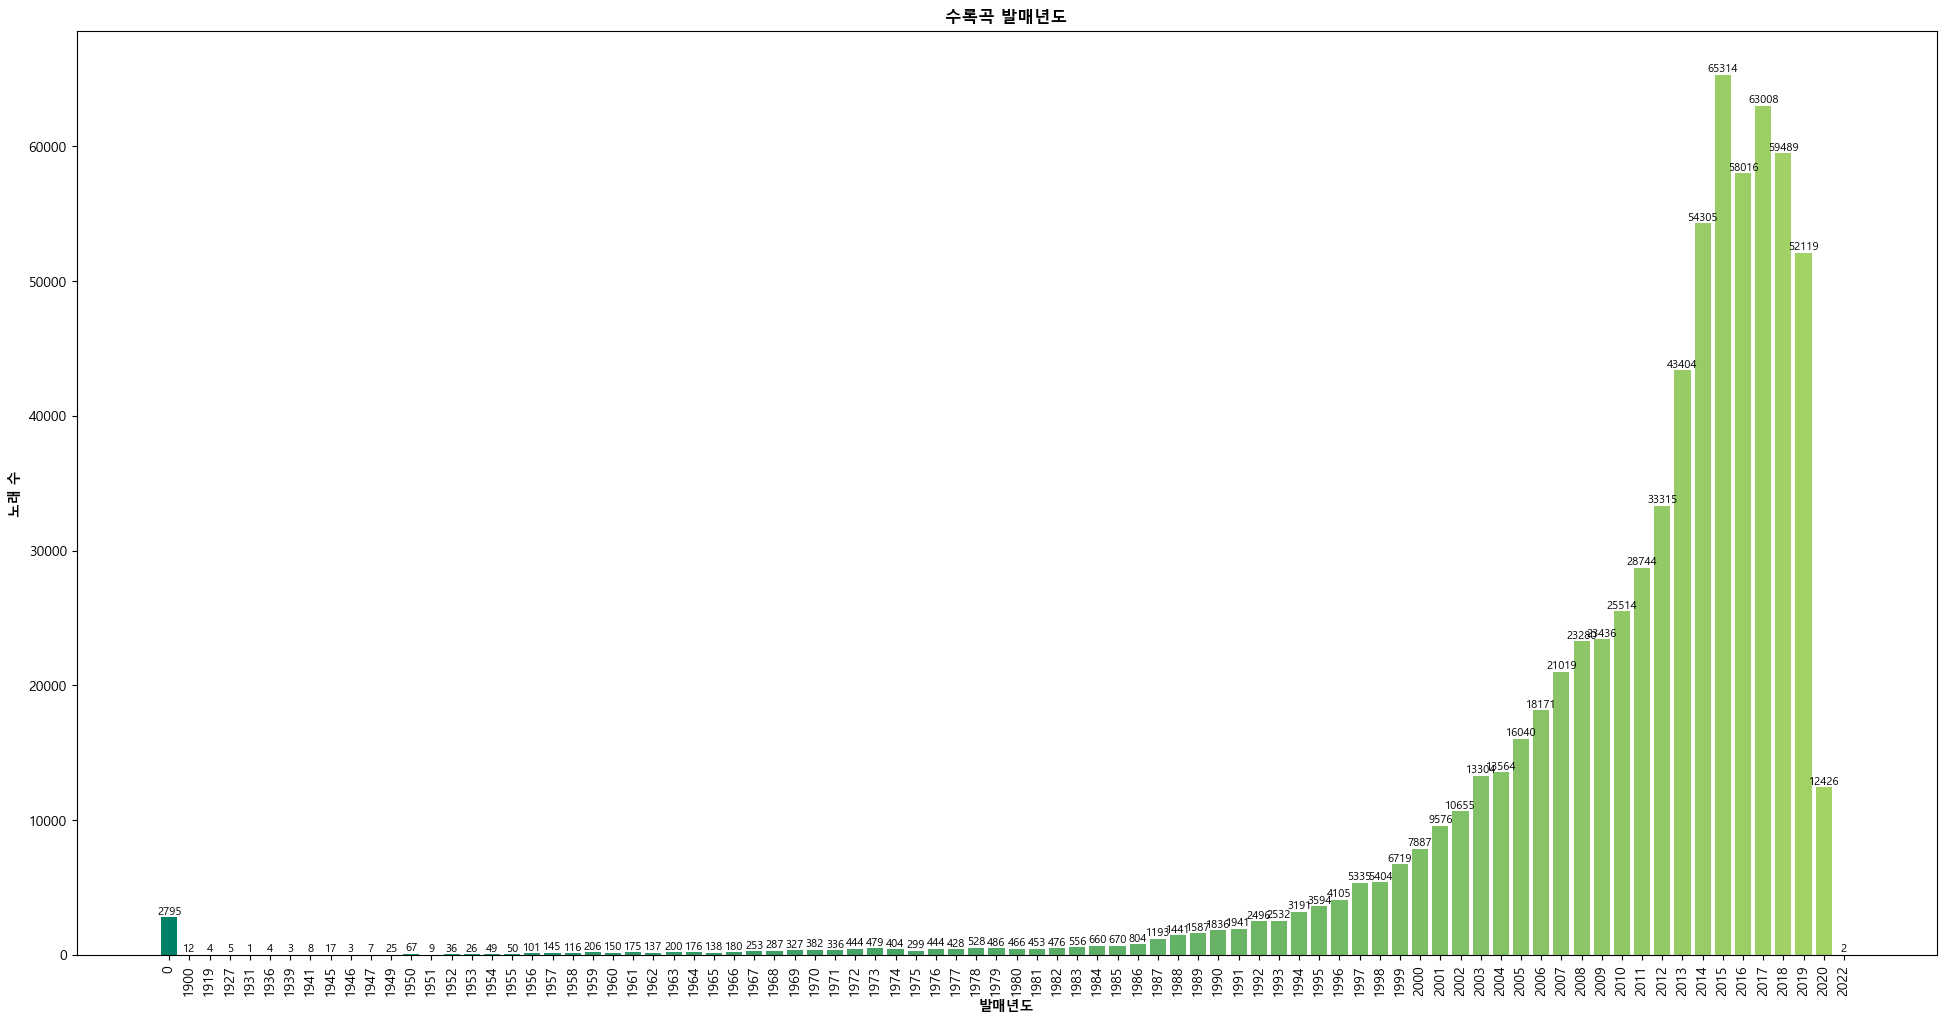

In [36]:
plt.figure(figsize=(24,12))
colors = plt.cm.summer([i*2 for i, _ in enumerate(song_meta_issue_date_label)])
bars = plt.bar(song_meta_issue_date_label, song_meta_issue_date_cnt, color=colors)
for bar, value in zip(bars, song_meta_issue_date_cnt):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=8)
plt.xticks(song_meta_issue_date_label, rotation="vertical")
plt.title("수록곡 발매년도", fontweight='bold')
plt.xlabel("발매년도", fontweight='bold')
plt.ylabel("노래 수", fontweight='bold')

# 4. 태그

### 플레이리스트 태그 빈도

In [37]:
from wordcloud import WordCloud
import collections

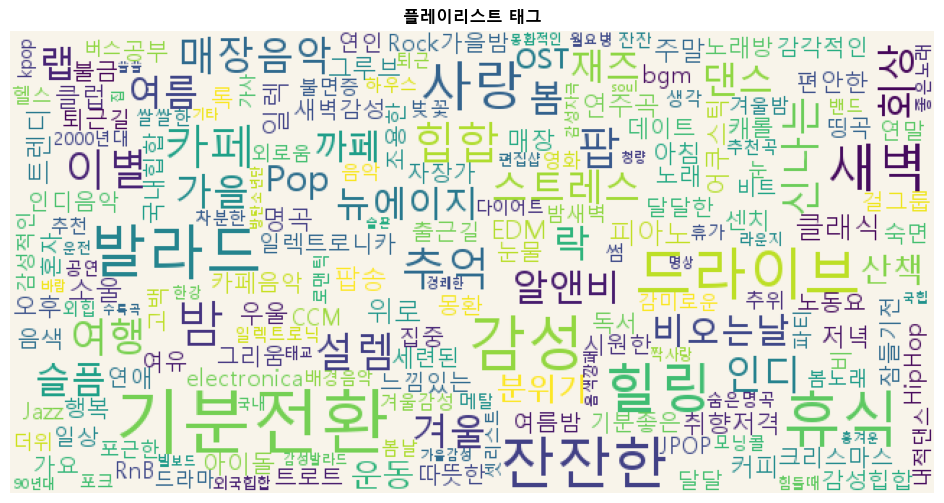

In [38]:
plt.figure(figsize=(12,6))
wc = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", background_color="#F8F4EA", max_font_size=48, width=640, height=320)
counter_dict = collections.Counter(plylist_train_tags_exploded["tags"])
cloud = wc.generate_from_frequencies(counter_dict)
plt.axis("off")
plt.title("플레이리스트 태그", fontweight='bold')
plt.imshow(cloud.to_image())    

### 노래 별 태그 수

* 여러 플레이리스트에 중복된 노래들이 있음
* 플레이리스트에 붙은 태그를 노래에 붙여보자


* 평균: 18개


In [39]:
song_tag_merged = pd.merge(plylist_train_songs_exploded, plylist_train_tags_exploded, how="left", left_on="id", right_on="id")
song_tag_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22860280 entries, 0 to 22860279
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   songs   object
 2   tags    object
dtypes: int64(1), object(2)
memory usage: 523.2+ MB


In [40]:
song_tag_df =  song_tag_merged.groupby("songs").agg({"tags": lambda row: set(row.tolist())}).reset_index(drop=False)
song_tag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615142 entries, 0 to 615141
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   songs   615142 non-null  int64 
 1   tags    615142 non-null  object
dtypes: int64(1), object(1)
memory usage: 9.4+ MB


In [41]:
sum(len(s) for s in song_tag_df["tags"])/len(song_tag_df)

17.857127297437014

In [43]:
tag_set = set()
song_tag_df["tags"].apply(lambda x: tag_set.add(x.pop()) if len(x) == 1 else 0)


{'이브', '따뜻한', '콜드플레이', '멜로디좋은노래', '백아연', '어쿠스틱한_팝_음악', '트렌디한', '회상기분전환', '멜론이가', '편안', '우리', '러닝타임', 'OST', '빈지노', '더위서', '플라이투더스카이', '디스코', '탑텐', 'RPQ', '명가', 'SWAG', '2019', '서영은', 'Myway', 'LiveWorship', '잘때', '고고고고', '고백', '피아노찾기', '유유자적', '안녕바다', '회사', '이별노래', '위로', '더브라더스', '펑크락', '여자가수', '월요일을', '라디오', '원더걸스', '낙엽', 'myunDo', '피터팬컴플렉스', '맥나잇', 'Club', '노상현', '다이나믹듀오', '진원', 'nb2힙합클럽다녀온후', '어쿠스틱팝', '어오유이냐오유', '밤새벽', '여름향기', '애니', '아기상어', '발라드찾기', '1', '조용한곳에서', '내꺼', '음악여행', '사색_하기좋은_노래', 'TMB', '올드', '대중가요', '우주', 'DJ', '피트니스뮤직', '가사없음', '청하', '케이팝스타', '동요마을', '한스밴드', '도입부', '새해', '따분한', '양다일', '심포닉메탈', '고음폭발', '라이브', '와라와라전용', '집중', '태민', '삼시세끼', '꿀보이스', '민서', 'jamiroquai', '에', '4월16일', '결혼축가', '페스티벌', '산책', '미스에스', '러브엑스테레오', '왁스', '일렉트릭', '드라이브할때신나는노래', '클럽', '찬불가', '찬양', 'bdayz', '맘속에', '뭐', '힐링', '유튜브', '노래추천', 'ㅁㄴㅇㄹ', '감성힙합', '1994', '여행노래', '락발라드', '장기하와얼굴들', '시간', '히힉', '겨울냄새', '트로피컬하우스', '양촌', '여름밤', '달달하게', '라틴', '우울', '오왠', '건즈', '다운된', '허각', '애드시런', '화지', 'matix', '

* 플레이리스트 추천 X -> 노래 추천
* 노래
    * 노래 메타: (노래id, 노래이름, 앨범이름, 가수이름, 장르list, 장르디테일list, 발행날짜)
    * 노래 설명: (노래id, 노래설명str)
        * 노래설명str: plylist태그, ply제목
* 전처리
    * 발행날짜가 0제외 1990년대 이전인 경우 삭제
    * 장르가 월드뮤직, CCM, 어린이/태교, 종교음악, 국악인 노래 삭제
    * plylist태그 가수이름, 장르명 삭제
    * 노래설명str이 존재하지 않는 경우 삭제

* 노래 가사랑 최신곡 크롤링하는게 좋을듯